# Deep Learning - Classification Example

I demonstrate the use of Deep Learning with Keras. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import tensorflow as tf
from tensorflow import keras

from keras import layers, models, utils, callbacks
from keras.layers import Input, Dense
from keras.models import Sequential, load_model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Data

In [2]:
data = load_iris()
# print(data.DESCR)

In [3]:
X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA

In [4]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [5]:
# X_train.info()

In [6]:
# y_train.value_counts()

# Modelling the Data

In [7]:
n_cols = X_train.shape[1]

model = Sequential()
model.add(Input(shape=(n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
# In the last layer (output layer) we have 3 nodes since 3 classes to predict and therefore use softmax. 
model.add(Dense(3, activation = 'softmax'))

If there are two or more label classes represented as a one-hot representation --> Use crossentropy in the compile step. 

If the labels are represented as integers, e.g. [0, 3, 2] --> Use SparseCategoricalCrossentropy in the compile step.

Check documentation: https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class


In [8]:
print(y_train.shape)
print(y_train)

# If we would like to use the CategoricalCrossentropy in the compile step as loss we would simply run this code: 
# y_train = to_categorical(y_train)

(120,)
22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 120, dtype: int64


In [9]:
model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])

In [10]:
early_stopping_monitor = EarlyStopping(patience = 2)
model_trained = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, callbacks = [early_stopping_monitor])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - accuracy: 0.3542 - loss: 1.1001 - val_accuracy: 0.3750 - val_loss: 1.0370
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6250 - loss: 0.9896 - val_accuracy: 0.7083 - val_loss: 0.9597
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6458 - loss: 0.9612 - val_accuracy: 0.7083 - val_loss: 0.9211
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6458 - loss: 0.9285 - val_accuracy: 0.7083 - val_loss: 0.8913
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6771 - loss: 0.8813 - val_accuracy: 0.8750 - val_loss: 0.8695
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7500 - loss: 0.8408 - val_accuracy: 0.5000 - val_loss: 0.8596
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7188 - loss: 0.8014 - val_accuracy: 0.5000 - val_loss: 0.8239
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7292 - loss: 0.7671 - val_accuracy: 0.5833 - val_loss

In [11]:
print(model_trained.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


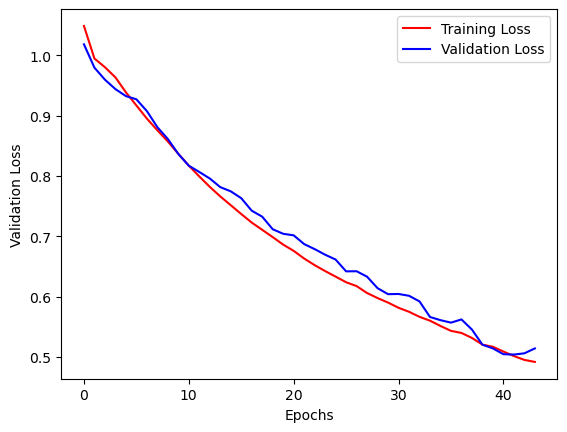

In [12]:
plt.plot(np.sqrt(model_trained.history['loss']), 'r', label='Training Loss')
plt.plot(np.sqrt(model_trained.history['val_loss']), 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

# Evaluating the model on the test data

In [13]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9333 - loss: 0.2496


[0.2495575100183487, 0.9333333373069763]